<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [3]:
X = data_values[:, 0:8]
y = data_values[:,8]

# Holdount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

[Text(0, 0, 'health \n 0.65'), Text(0, 0, 'sick\n0.35')]

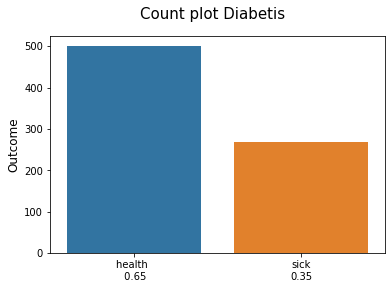

In [5]:
fig, ax = plt.subplots(figsize = (6,4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x=data_values[:,8], ax = ax)
ax.set_ylabel('Outcome', size = 12)
_, data_target = np.unique(data_values[:,8], return_counts = True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])

- Hay un desbalance

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 1)

Epoch 1/300
34/34 [==============================] - 1s 11ms/step - loss: 9.3340 - accuracy: 0.6406 - recall: 0.0106 - val_loss: 4.8184 - val_accuracy: 0.6407 - val_recall: 0.0380
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 2.9806 - accuracy: 0.6555 - recall: 0.2698 - val_loss: 1.5023 - val_accuracy: 0.5801 - val_recall: 0.5696
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 1.5548 - accuracy: 0.6145 - recall: 0.5556 - val_loss: 1.3293 - val_accuracy: 0.6061 - val_recall: 0.4684
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 1.3330 - accuracy: 0.6220 - recall: 0.5185 - val_loss: 1.1064 - val_accuracy: 0.5714 - val_recall: 0.4810
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 1.1585 - accuracy: 0.6406 - recall: 0.5026 - val_loss: 1.0019 - val_accuracy: 0.6147 - val_recall: 0.4051
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 1.0605 - accuracy: 0.6276 - rec

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [8]:
# Problema de optimización
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f'% loss)

17/17 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7709 - recall: 0.7090
Recall: 0.709
Accuracy: 0.771
Loss: 0.464


In [9]:
# Problema de optimización
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % recall)
print('Val Accuracy: %.3f' % accuracy)
print('val Loss: %.3f'% loss)

8/8 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7056 - recall: 0.5949
Val Recall: 0.709
Val Accuracy: 0.771
val Loss: 0.464


In [10]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# Recall and Loss

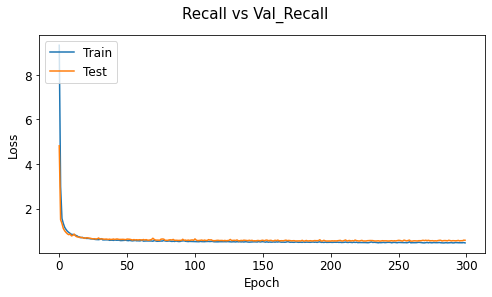

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle('Recall vs Val_Recall', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [12]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [13]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[2.0, 146.0, 0.0, 0.0, 0.0, 27.5, 0.24, 28.0] --> 1 (real 1)
[0.0, 117.0, 80.0, 31.0, 53.0, 45.2, 0.08900000000000001, 24.0] --> 0 (real 0)
[2.0, 197.0, 70.0, 99.0, 0.0, 34.7, 0.575, 62.0] --> 1 (real 1)
[5.0, 99.0, 74.0, 27.0, 0.0, 29.0, 0.203, 32.0] --> 0 (real 0)
[3.0, 116.0, 74.0, 15.0, 105.0, 26.3, 0.107, 24.0] --> 0 (real 0)
[0.0, 117.0, 66.0, 31.0, 188.0, 30.8, 0.493, 22.0] --> 0 (real 0)
[3.0, 102.0, 74.0, 0.0, 0.0, 29.5, 0.121, 32.0] --> 0 (real 0)
[1.0, 0.0, 74.0, 20.0, 23.0, 27.7, 0.299, 21.0] --> 0 (real 0)
[3.0, 111.0, 58.0, 31.0, 44.0, 29.5, 0.43, 22.0] --> 0 (real 0)
[4.0, 145.0, 82.0, 18.0, 0.0, 32.5, 0.235, 70.0] --> 0 (real 1)
[0.0, 179.0, 50.0, 36.0, 159.0, 37.8, 0.455, 22.0] --> 1 (real 1)
[2.0, 99.0, 52.0, 15.0, 94.0, 24.6, 0.637, 21.0] --> 0 (real 0)
[6.0, 123.0, 72.0, 45.0, 230.0, 33.6, 0.733, 34.0] --> 1 (real 0)
[1.0, 144.0, 82.0, 46.0, 180.0, 46.1, 0.335, 46.0] --> 1 (real 1)
[1.0, 117.0, 88.0, 24.0, 145.0, 34.5, 0.40299999999999997, 40.0] --> 0 (real 1)


# Sesgo predictivo

In [14]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos

# Sick
average_prediction = (len(y_pred[y_pred==1])/len(y_pred))
average_label_target = (len(y_test[y_test==1]) / len(y_test)) 
sesgo_prediction = average_prediction - average_label_target
sesgo_prediction

0.017316017316017285

# Confusion Matrix

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[116,  36],
       [ 32,  47]])

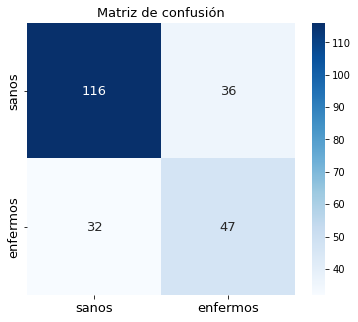

In [16]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

# Metrics

In [17]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Prediction:   {metrics.precision_score(y_test, y_pred, [1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, [1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, [1], average="macro")}' )

Accuracy  :   0.7056277056277056
Kappa     :   0.35379298996215236
predicción enfermos
Prediction:   0.5662650602409639
Recall    :   0.5949367088607594
Specificity:   0.7631578947368421
F1-score   :   0.5802469135802469


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [18]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []

for train, test in kfold.split(X,y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)
  loss_train, _,recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

loss: 0.484 recall: 66.805% val_loss: 0.440 val_recall: 43.955%
loss: 0.459 recall: 56.017% val_loss: 0.539 val_recall: 53.875%
loss: 0.516 recall: 56.846% val_loss: 0.531 val_recall: 53.064%
loss: 0.460 recall: 64.315% val_loss: 0.509 val_recall: 50.944%
loss: 0.486 recall: 70.539% val_loss: 0.489 val_recall: 48.867%
loss: 0.491 recall: 70.124% val_loss: 0.457 val_recall: 45.660%
loss: 0.502 recall: 72.614% val_loss: 0.452 val_recall: 45.221%
loss: 0.476 recall: 63.900% val_loss: 0.435 val_recall: 43.503%
loss: 0.480 recall: 50.826% val_loss: 0.439 val_recall: 43.889%
loss: 0.498 recall: 64.050% val_loss: 0.559 val_recall: 55.929%


In [19]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

==============================Train Recall Total 10 pliegues==============================
0.64% (+/- 0.07%)
==============================Test Recall Total 10 pliegues==============================
0.67% (+/- 0.12%)
==============================Train Loss Total 10 pliegues==============================
0.49% (+/- 0.02%)
==============================Test Loss Total 10 pliegues==============================
0.48% (+/- 0.04%)


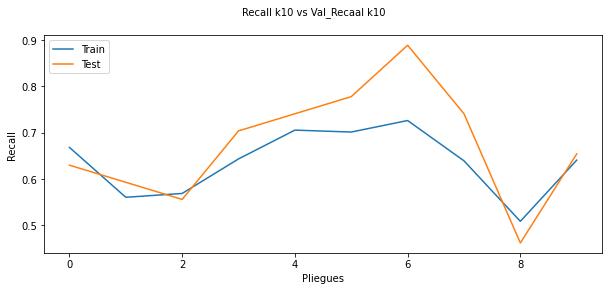

In [20]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

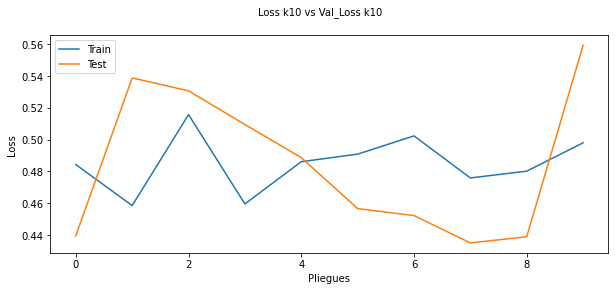

In [21]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)